### Datasets
Thermal Image dataset for object classification [click](https://data.mendeley.com/datasets/btmrycjpbj/1)

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/btmrycjpbj-1.zip
!unzip btmrycjpbj-1.zip
#Advertencia. Algunas carpetas están mal etiquetadas. En la carpeta de carro hay gatos y en la de gatos, carros.

In [ ]:
!mv /content/Dataset/SeekThermal/Train/Cat /content/Dataset/SeekThermal/Train/car
!mv /content/Dataset/SeekThermal/Train/Car /content/Dataset/SeekThermal/Train/cat
!mv /content/Dataset/SeekThermal/Train/Man /content/Dataset/SeekThermal/Train/man

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import scipy.io as sio
import glob
import cv2
from sklearn import svm
from scipy import signal
from skimage.filters import threshold_otsu
from matplotlib.patches import Circle
from sklearn.cluster import KMeans
from scipy import stats
#sns.set_theme()

In [ ]:
images=glob.glob('/content/Dataset/*/*/*/*.jpg')
print('number of images :', np.shape(images)[0])

number of images : 6843


In [ ]:
def looking_for_copies(name):
  return len(name.split(' '))

look=np.vectorize(looking_for_copies)
vp=look(images)
print('number of copies :', np.sum(vp==2))

number of copies : 212


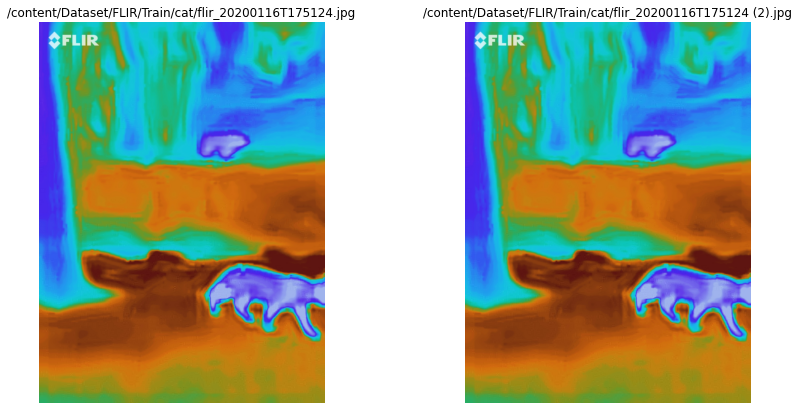

In [ ]:
copies=np.array(images)[vp==2]
sx=np.random.choice(np.shape(copies)[0])
copi=copies[sx].split(' ')[0]+'.jpg'
orig=np.where(np.array(images)==copi)
if len(orig[0])==0:
  print('false copy')
else:
  org=cv2.imread(images[orig[0][0]])
  cop=cv2.imread(copies[sx])
  plt.figure(figsize=(14,7))
  plt.subplot(1,2,1)
  plt.imshow(org)
  plt.title(images[orig[0][0]])
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(cop)
  plt.title(copies[sx])
  plt.axis('off')

In [ ]:
def falses_copies(name):
  copi=name.split(' ')[0]+'.jpg'
  orig=np.where(np.array(images)==copi)
  return len(orig[0])

lookF=np.vectorize(falses_copies)
vpf=lookF(copies)
print('number of false copies :', np.sum(vpf==0))

number of false copies : 64


In [ ]:
real_c=copies[vpf==1]
vec=np.ones(np.shape(images)[0])
for j in range(np.shape(images)[0]):
  idn=np.where(real_c==images[j])[0]
  if len(idn)!=0:
    vec[idn[0]]=0

In [ ]:
imagenes=np.array(images)[vec==1]

Camera	:  SeekThermal
Object	:  man
name	:  img_thermal_1583321406793.jpg


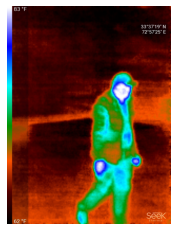

In [ ]:
siz=np.shape(imagenes)[0]
ind=np.random.choice(siz)
plt.imshow(cv2.imread(imagenes[ind]))
plt.axis('off')

inf=imagenes[ind].split('/')
print('Camera\t: ', inf[3])
print('Object\t: ', inf[5])
print('name\t: ', inf[6])

In [ ]:
categorical_labels=np.array(['man', 'cat', 'car'])
labels=[]
sh=[]
for i in imagenes:
  info=i.split('/')
  ima=cv2.imread(i)
  sh.append(np.shape(ima))
  labels.append(np.where(categorical_labels==info[5])[0][0])
sh=np.matrix(sh)
labels=np.array(labels)

In [ ]:
print('man\t:',np.sum(labels==0),'\ncat\t:', np.sum(labels==1),'\ncar\t:', np.sum(labels==2))
print(np.min(sh, axis=0), np.max(sh, axis=0))

man	: 2491 
cat	: 1816 
car	: 2388
[[400 300   3]] [[1440 1080    3]]


In [ ]:
from skimage.transform import resize

In [ ]:
def resize_images(ima, new_shape=(128, 128), cut=True):
  if cut:
    szz=np.shape(ima)
    ax=np.argmin(szz[:-1])
    row_0=int((szz[0]-szz[ax])/2)
    col_0=int((szz[1]-szz[ax])/2)
    ima=ima[row_0:row_0+szz[ax],col_0:col_0+szz[ax],:]
  ima=resize(ima, new_shape)
  return ima

In [ ]:
tm=np.shape(imagenes)[0]
out=np.zeros((tm,128,128,3))
for i in range(tm):
  out[i]=resize_images(cv2.imread(imagenes[i]))
  print('\rprocess: ', (i+1)*100/tm, end='')
  sio.savemat('ima_cut.mat',{'images': out, 'labels': labels})

In [ ]:
tm=np.shape(imagenes)[0]
out=np.zeros((tm,128,128,3))
for i in range(tm):
  out[i]=resize_images(cv2.imread(imagenes[i]), cut=False)
  print('\rprocess: ', (i+1)*100/tm, end='')
sio.savemat('ima_distor.mat',{'images': out, 'labels': labels})

process:  1.0